## 1.- Download and save the text 

In [1]:
import requests

url = "https://www.gutenberg.org/cache/epub/1581/pg1581.txt"
response = requests.get(url)

if response.status_code == 200:
    with open("Douay-Rheims.txt", "w",encoding="utf-8") as file:
        file.write(response.text,)
    print("File downloaded successfully!")
else:
    print("Failed to download file. Status code:", response.status_code)

File downloaded successfully!


## 2. Parsing 

In this section we parese the bible in chapter and verses.
The logic is simple, we find all the chapter titles using regular expressions, and we use that to split. 
There are foot notes and annotations, particularly in the end, however we are only interested in Bible verses, so after we split by \n\n\n\n, we only keep those lines that start wit \d+:\d+ i.e chapter and verse like 12:5 etc. 


In [2]:
import re
# Sample text
with open('Douay-Rheims.txt', 'r',encoding="utf-8") as f:
    text = f.read()
expression = re.compile(r"(?=^.+Chapter \d+)", re.MULTILINE)
chapters = re.split(expression,text)

In [3]:
# Find all the chapters
expression = re.compile(r"^.+Chapter \d+", re.MULTILINE)
chapter_names =re.findall(expression,text)

In [4]:
# List the books. The Catholic Canon has 73 books, the protestans removed the seven deuterocanonicals
books = {}
for c in chapter_names:
    book = re.split(' Chapter',c)[0]
    if book in books.keys():
        books[book]+=1
    else:
        books[book]=1

print(f'Total books {len(books)}')
for x in books:
    print(x)

Total books 73
Genesis
Exodus
Leviticus
Numbers
Deuteronomy
Josue
Judges
Ruth
1 Kings
2 Kings
3 Kings
4 Kings
1 Paralipomenon
2 Paralipomenon
1 Esdras
2 Esdras
Tobias
Judith
Esther
Job
Psalms
Proverbs
Ecclesiastes
Canticle of Canticles
Wisdom
Ecclesiasticus
Isaias
Jeremias
Lamentations
Baruch
Ezechiel
Daniel
Osee
Joel
Amos
Abdias
Jonas
Micheas
Nahum
Habacuc
Sophonias
Aggeus
Zacharias
Malachias
1 Machabees
2 Machabees
Matthew
Mark
Luke
John
Acts
Romans
1 Corinthians
2 Corinthians
Galatians
Ephesians
Philippians
Colossians
1 Thessalonians
2 Thessalonians
1 Timothy
2 Timothy
Titus
Philemon
Hebrews
James
1 Peter
2 Peter
1 John
2 John
3 John
Jude
Apocalypse


In [5]:
# Split the bible in chapters
expression = re.compile(r"(?=^.+Chapter \d+)", re.MULTILINE)
chapters = re.split(expression,text)

bible_dict = {}
# Split the chapters in verses
verses_regex = re.compile(r"\n\n\n\n", re.MULTILINE)
verse_number_regex = re.compile(r"^\d+:\d+\. ", re.MULTILINE)


from collections import namedtuple
Verse = namedtuple('Verse', ['book','chapter', 'verse', 'text'])
verse_number_regex = re.compile(r"^\d+:\d+\. ", re.MULTILINE)


def separate_verse_num(x,c):
    m= re.findall(verse_number_regex,x)
    vn = re.sub(r"\. ",r"",m[0]).split(":")
    text = re.sub(verse_number_regex,r"",x)
    book_name = re.sub(r' Chapter \d+.*',r'',c)
    return Verse(book=book_name ,chapter=vn[0],verse=vn[1],text=text)

n = len(chapter_names)
for c in range(n):
   chapter_dict = { chapter_names[c]: [separate_verse_num(x,chapter_names[c]) for x in re.split(verses_regex,chapters[c+1]) if re.match(r"(?=^\d+:\d+\. )",x)]}
   bible_dict.update(chapter_dict)


In [6]:
len(chapter_names)

1334

As a sanity check, we review that Apocalypse Chapter 22 looks nice. It is the last book and wanted to double chech that all versers are there and no extranues notes are present

In [7]:
for v in bible_dict['Apocalypse Chapter 22']:
    print(v.book,v.chapter,":",v.verse,"::",v.text)

Apocalypse 22 : 1 :: And he shewed me a river of water of life, clear as crystal,

proceeding from the throne of God and of the Lamb.
Apocalypse 22 : 2 :: In the midst of the street thereof, and on both sides of the

river, was the tree of life, bearing twelve fruits, yielding its fruits

every month: and the leaves of the tree for the healing of the nations.
Apocalypse 22 : 3 :: And there shall be no curse any more: but the throne of God and

of the Lamb shall be in it. And his servants shall serve him.
Apocalypse 22 : 4 :: And they shall see his face: and his name shall be on their

foreheads.
Apocalypse 22 : 5 :: And night shall be no more. And they shall not need the light of

the lamp, nor the light of the sun, because the Lord God shall

enlighten them. And they shall reign for ever and ever.
Apocalypse 22 : 6 :: And he said to me: These words are most faithful and true. And

the Lord God of the spirits of the prophets sent his angel to shew his

servants the things which must be

In [8]:
#!pip install -U sentence-transformers

In [9]:
from sentence_transformers import SentenceTransformer
model = SentenceTransformer('msmarco-distilbert-cos-v5')

Now, we embedd all the verses across all chapters

In [10]:
import time 
bible_embeddings = dict( z for z in zip(chapter_names, [None]*len(chapter_names)))

n = 1 
m = len(chapter_names)
for c in chapter_names:
    start = time.time()
    bible_embeddings[c] =model.encode(" ".join([verse.text for verse in bible_dict[c]] ))
    end = time.time()
    print(f"encoding {c}, {n} of {m}, time taken {(end-start):.2f} seconds ")
    n = n+1

encoding Genesis Chapter 1, 1 of 1334, time taken 0.81 seconds 
encoding Genesis Chapter 2, 2 of 1334, time taken 0.16 seconds 
encoding Genesis Chapter 3, 3 of 1334, time taken 0.17 seconds 
encoding Genesis Chapter 4, 4 of 1334, time taken 0.14 seconds 
encoding Genesis Chapter 5, 5 of 1334, time taken 0.17 seconds 
encoding Genesis Chapter 6, 6 of 1334, time taken 0.16 seconds 
encoding Genesis Chapter 7, 7 of 1334, time taken 0.14 seconds 
encoding Genesis Chapter 8, 8 of 1334, time taken 0.14 seconds 
encoding Genesis Chapter 9, 9 of 1334, time taken 0.11 seconds 
encoding Genesis Chapter 10, 10 of 1334, time taken 0.11 seconds 
encoding Genesis Chapter 11, 11 of 1334, time taken 0.11 seconds 
encoding Genesis Chapter 12, 12 of 1334, time taken 0.15 seconds 
encoding Genesis Chapter 13, 13 of 1334, time taken 0.15 seconds 
encoding Genesis Chapter 14, 14 of 1334, time taken 0.11 seconds 
encoding Genesis Chapter 15, 15 of 1334, time taken 0.11 seconds 
encoding Genesis Chapter 16,

In [11]:
import pickle
#with open('data/bible_dict.pkl', 'wb') as file:
#    # Dump the object to the file
#    pickle.dump(bible_dict, file)
#with open('data/bible_embeddings.pkl', 'wb') as file:
#    # Dump the object to the file
#    pickle.dump(bible_embeddings, file)

In [12]:
# Create a Matrix
matrix = []

for c in chapter_names:
        matrix.append(bible_embeddings[c])
            

In [13]:
import numpy as np
matrix = np.array(matrix)
matrix.shape

(1334, 768)

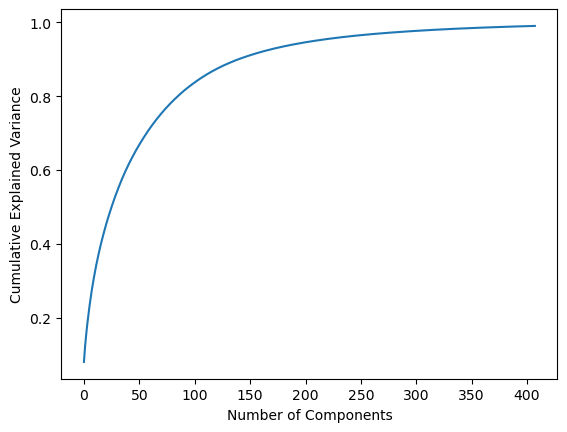

In [14]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import normalize
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt


# Step 1: Convert list of NumPy arrays to a 2D matrix (e.g., a matrix with shape (n_samples, n_features))
X = matrix

# Step 2: Standardize the data (important for PCA)
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

# Step 3: Apply PCA to reduce dimensionality
pca = PCA(n_components=0.99)  
X_pca = pca.fit_transform(X_scaled)

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.show()

pca = PCA(n_components=50)  
X_pca = pca.fit_transform(X_scaled)

## Elbow Method, selecting number of Clusters

env: OMP_NUM_THREADS=6


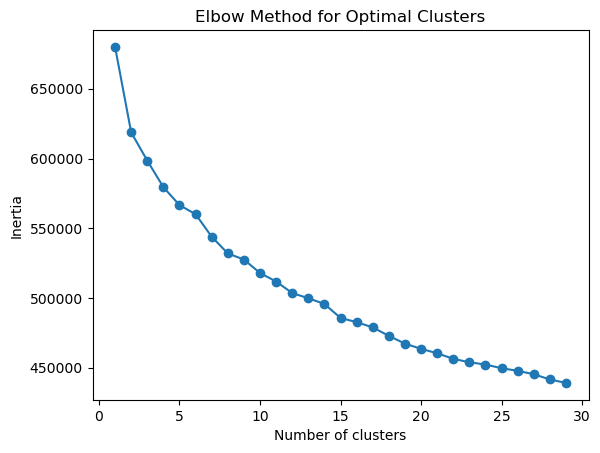

In [15]:
%env OMP_NUM_THREADS=6
import warnings
warnings.filterwarnings('ignore')

from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Calculate inertia for different numbers of clusters
inertia = []
for k in range(1, 30):  # Try from 1 to 10 clusters
    kmeans = KMeans(n_clusters=k,random_state=20241127)
    kmeans.fit(X_pca)
    inertia.append(kmeans.inertia_)

# Plot inertia to find the "elbow"
plt.plot(range(1, 30), inertia, marker='o')
plt.title('Elbow Method for Optimal Clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

## Clustering 

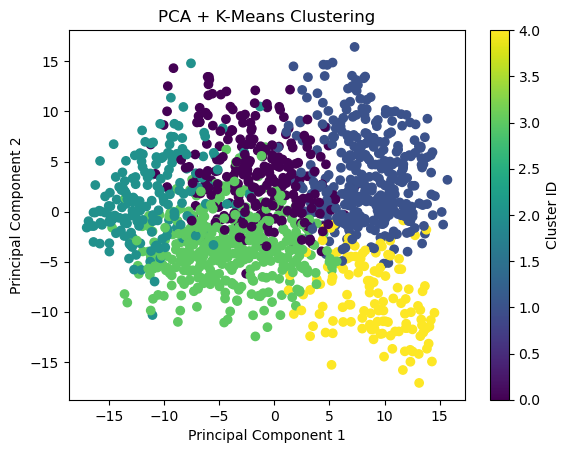

Cluster Centers (in PCA space):
[[-1.69379759e+00  3.60014200e+00  1.02586949e+00 -2.64616823e+00
  -4.03823709e+00  1.28659284e+00  1.29390466e+00  1.46019912e+00
   3.04384112e-01  1.01992816e-01  3.14097553e-01  4.12139118e-01
  -4.51294422e-01 -6.92075074e-01 -5.08420527e-01 -3.25865835e-01
   2.60170698e-01  3.99099767e-01  6.54762983e-02 -2.79539764e-01
   5.72369576e-01  1.57462791e-01  1.72420442e-02 -4.41060483e-01
  -4.43329923e-02 -1.97537705e-01 -3.79594803e-01 -1.03999570e-01
  -1.89924002e-01 -3.33227247e-01  1.03261760e-02 -6.33661747e-02
   1.23777591e-01  9.21979323e-02  2.99565047e-01 -8.56501162e-02
   7.73328245e-02 -5.41315824e-02 -5.78916222e-02 -5.89975417e-02
   2.13448152e-01 -1.19668871e-01 -1.56652063e-01  9.23620835e-02
  -1.18019305e-01  7.75217861e-02  1.57247707e-01  1.07221045e-01
   8.76750350e-02  1.32617146e-01]
 [ 8.30523777e+00  3.49327159e+00 -2.18195572e-01  5.89108169e-01
   1.93541133e+00 -9.26884532e-01 -5.81752896e-01 -1.72355562e-03
  -3.7109

In [16]:
# Step 4: Apply Clustering 
kmeans = KMeans(n_clusters=5)  
kmeans.fit(X_pca)

# Step 5: Visualize the result 
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=kmeans.labels_, cmap='viridis')
plt.title("PCA + K-Means Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster ID")
plt.show()

# Step 6: Optionally, print cluster centers
print("Cluster Centers (in PCA space):")
print(kmeans.cluster_centers_)

In [17]:
import pandas as pd
labels = {'labels':kmeans.labels_,}
labels = pd.DataFrame(labels)
labels.groupby('labels').size()

labels
0    269
1    359
2    190
3    386
4    130
dtype: int64

In [18]:
array_text = []
array_book = []
for c in chapter_names:
        array_text.append(" ".join([v.text for v in bible_dict[c]]))
        array_book.append(bible_dict[c][0].book)
df_text = pd.DataFrame({'text':array_text, 'book':array_book})
df_text['cluster'] =kmeans.labels_
df_text.head()

,text,book,cluster
0,"In the beginning God created heaven, and earth...",Genesis,0
1,"So the heavens and the earth were finished, an...",Genesis,0
2,Now the serpent was more subtle than any of th...,Genesis,0
3,And Adam knew Eve his wife; who conceived and ...,Genesis,0
4,This is the book of the generation of Adam. In...,Genesis,2


Cluster 0 


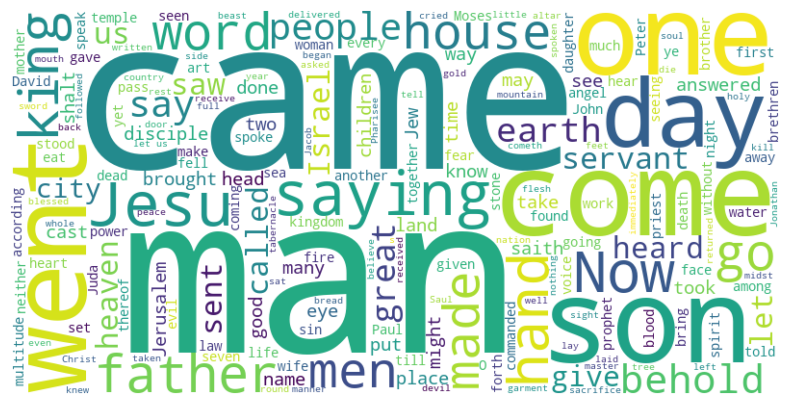

Cluster 1 


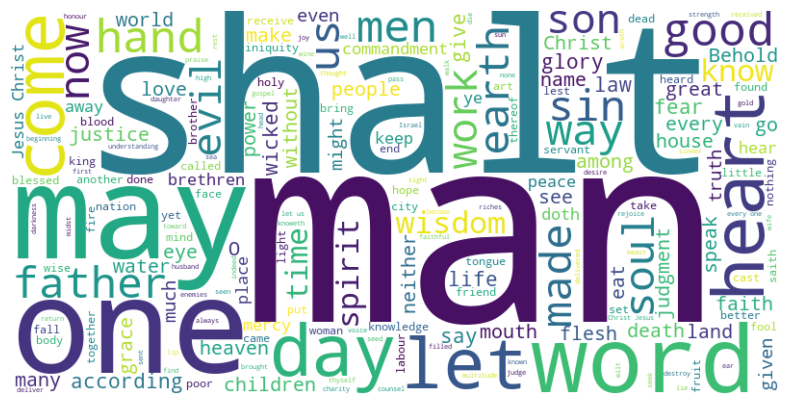

Cluster 2 


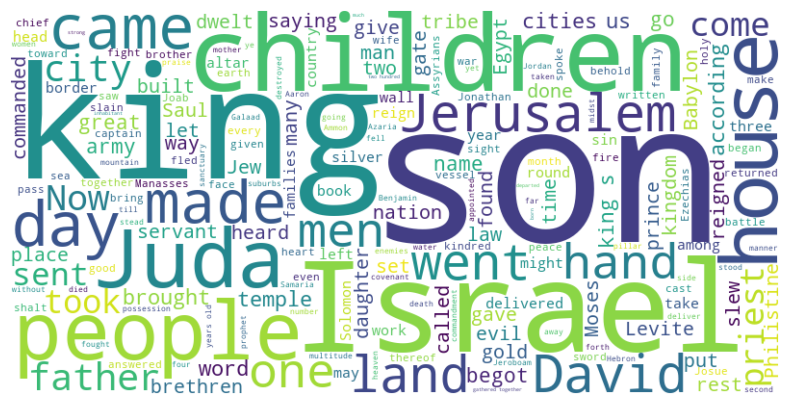

Cluster 3 


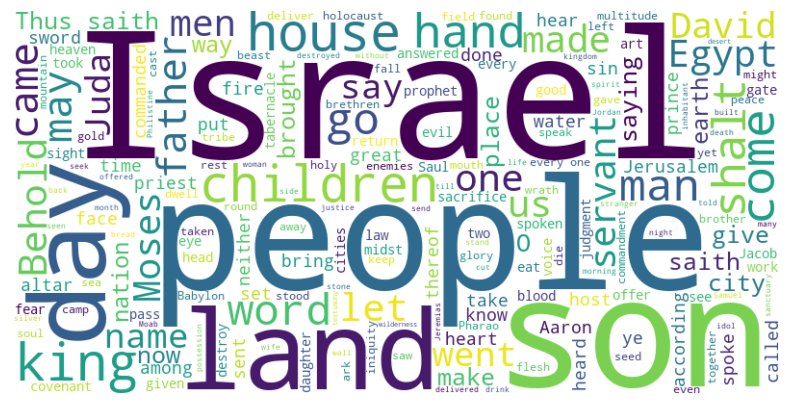

Cluster 4 


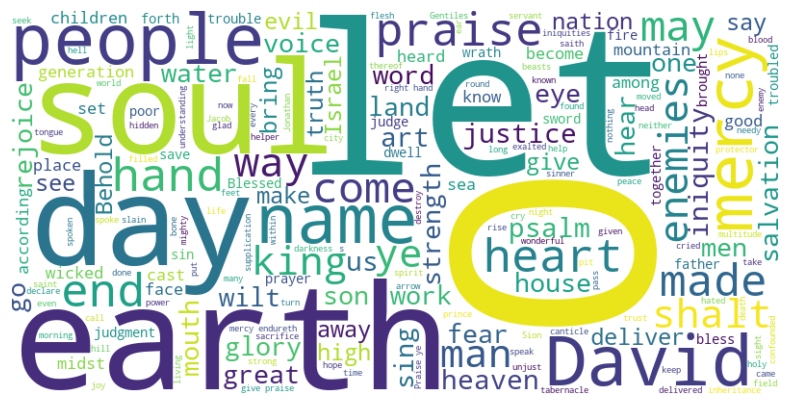

In [19]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt

stopwords = set(STOPWORDS)
stopwords.update(["thy", "thou","thee", "Lord","God","thing","hath","things","hast","upon","unto","will","said"]) # Extremely common in the source material

for i in range(5):
    txt = '\n'.join(df_text.loc[df_text['cluster']==i]['text'])
    # Generate the word cloud
    wordcloud = WordCloud(
        width=800, height=400, 
        background_color='white', 
        stopwords = stopwords,
        colormap='viridis'
    ).generate(txt)
    print (f"Cluster {i} ")
    # Plot the word cloud
    plt.figure(figsize=(10, 5))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')  # No axes
    plt.show()

## Cluster Composition by Book in the Bible

We want to visualize the proportion of verses in the different clusters across each book.

In [20]:
#First we group the verses by cluster and book
books_clusters = df_text.groupby(['book','cluster'],as_index=False).size()
books_clusters.head()

,book,cluster,size
0,1 Corinthians,0,2
1,1 Corinthians,1,14
2,1 Esdras,2,8
3,1 Esdras,3,2
4,1 John,1,5


In [21]:
books = df_text['book'].unique()
print(books)
print(len(books))

['Genesis' 'Exodus' 'Leviticus' 'Numbers' 'Deuteronomy' 'Josue' 'Judges'
 'Ruth' '1 Kings' '2 Kings' '3 Kings' '4 Kings' '1 Paralipomenon'
 '2 Paralipomenon' '1 Esdras' '2 Esdras' 'Tobias' 'Judith' 'Esther' 'Job'
 'Psalms' 'Proverbs' 'Ecclesiastes' 'Canticle of Canticles' 'Wisdom'
 'Ecclesiasticus' 'Isaias' 'Jeremias' 'Lamentations' 'Baruch' 'Ezechiel'
 'Daniel' 'Osee' 'Joel' 'Amos' 'Abdias' 'Jonas' 'Micheas' 'Nahum'
 'Habacuc' 'Sophonias' 'Aggeus' 'Zacharias' 'Malachias' '1 Machabees'
 '2 Machabees' 'Matthew' 'Mark' 'Luke' 'John' 'Acts' 'Romans'
 '1 Corinthians' '2 Corinthians' 'Galatians' 'Ephesians' 'Philippians'
 'Colossians' '1 Thessalonians' '2 Thessalonians' '1 Timothy' '2 Timothy'
 'Titus' 'Philemon' 'Hebrews' 'James' '1 Peter' '2 Peter' '1 John'
 '2 John' '3 John' 'Jude' 'Apocalypse']
73


In [22]:
# We need to reformat our datafame to allow the desired visualization
new_books_clusters ={'book':books,0:[0]*len(books),1:[0]*73,2:[0]*73,3:[0]*73,4:[0]*73}
new_books_clusters = pd.DataFrame(new_books_clusters)
for i in range(books_clusters.shape[0]):
    new_books_clusters.loc[new_books_clusters['book']==books_clusters.loc[i,'book'],books_clusters.loc[i,'cluster']]=books_clusters.loc[i,'size']

new_books_clusters.head()

,book,0,1,2,3,4
0,Genesis,27,2,5,16,0
1,Exodus,7,2,4,26,1
2,Leviticus,7,2,0,18,0
3,Numbers,3,1,6,26,0
4,Deuteronomy,0,13,1,20,0


In [23]:
#Now, we divide by the total number of verses to get percentages 
for i in range(new_books_clusters.shape[0]):
    s=0.0
    for j in range(5):
        s=s+new_books_clusters.loc[i,j]
    for j in range(5):
        new_books_clusters.loc[i,j]=new_books_clusters.loc[i,j]/s
new_books_clusters.head()

,book,0,1,2,3,4
0,Genesis,0.540000,0.040000,0.100000,0.320000,0.000
1,Exodus,0.175000,0.050000,0.100000,0.650000,0.025
2,Leviticus,0.259259,0.074074,0.000000,0.666667,0.000
3,Numbers,0.083333,0.027778,0.166667,0.722222,0.000
4,Deuteronomy,0.000000,0.382353,0.029412,0.588235,0.000


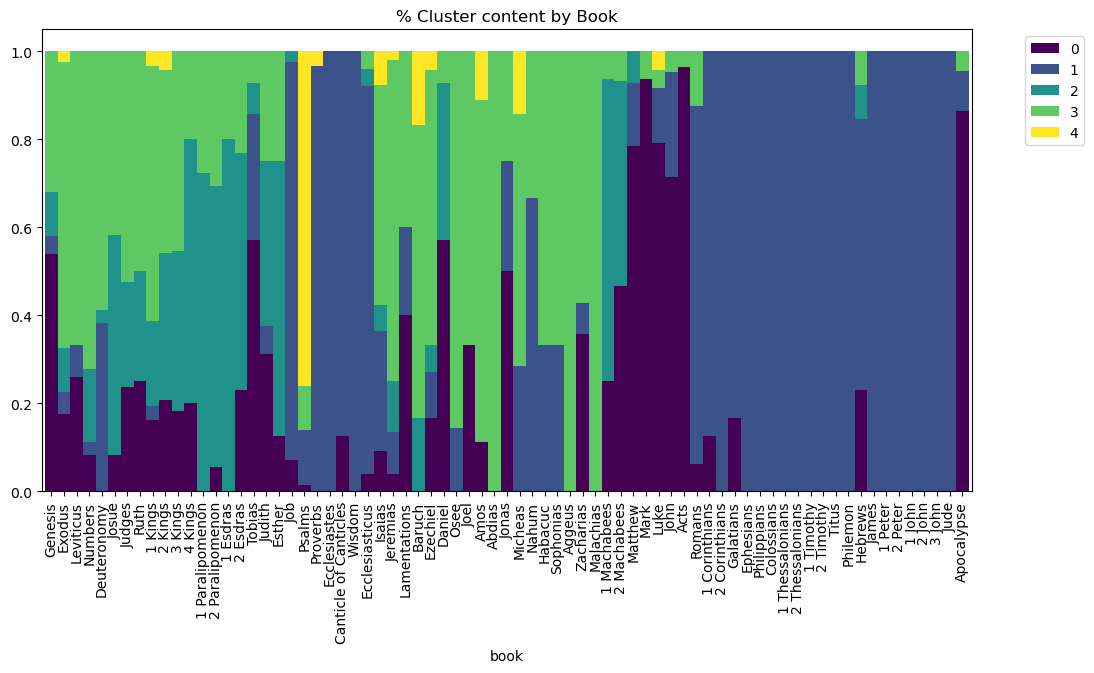

In [24]:
ax = new_books_clusters.plot(x='book', kind='bar', stacked=True,
        title='% Cluster content by Book',figsize=(12, 6), colormap='viridis',width=1.0)


ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [25]:
result = df_text.loc[(df_text['cluster']==0) & (df_text['book']=='Leviticus'),'text']

for x in result:
    print("__________________________________________________")
    print(x)

__________________________________________________
When any one shall offer an oblation of sacrifice to the Lord, his

offering shall be of fine flour: and he shall pour oil upon it, and put

frankincense, And shall bring it to the sons of Aaron the priests. And one of

them shall take a handful of the flour and oil, and all the

frankincense; and shall put it a memorial upon the altar for a most

sweet savour to the Lord. And the remnant of the sacrifice shall be Aaron’s, and his sons’,

holy of holies of the offerings of the Lord. But when thou offerest a sacrifice baked in the oven of flour, to

wit, loaves without leaven, tempered with oil, and unleavened wafers,

anointed with oil: If thy oblation be from the fryingpan, of flour tempered with oil,

and without leaven: Thou shalt divide it into little pieces, and shalt pour oil upon

it. And if the sacrifice be from the gridiron, in like manner the

flour shall be tempered with oil. And when thou offerest it to the Lord, thou shalt

## Latent Dirichlet Allocation

In [26]:
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import LatentDirichletAllocation

# Vectorize the data
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(df_text['text'])

# Create and fit the LDA model
lda = LatentDirichletAllocation(n_components=10, random_state=42) 
lda.fit(X)

# Print top words per topic
feature_names = vectorizer.get_feature_names_out()
for topic_idx, topic in enumerate(lda.components_):
    print(f"Topic {topic_idx}:")
    print(" ".join([feature_names[i] for i in topic.argsort()[:-10 - 1:-1]]))

# Assign topics to documents
doc_topic_dist = lda.transform(X)

Topic 0:
unawares hanon ooliba stewardship mammon oolla finishing conspire revive doted
Topic 1:
fellowship nabal sufferings orchard reprobates barac susanna emptied bochri seba
Topic 2:
pilate baruch ismael sarai isboseth villages cariath caree subjected nerias
Topic 3:
duke heth aged ministration ariel sobal dalila debt grafted butler
Topic 4:
king son david israel sons saul juda solomon philistines ark
Topic 5:
shall lord thy thou god thee hath said man shalt
Topic 6:
masphath ceila heber vasthi phassur ptolemy furbished lysimachus ecclesiastes chus
Topic 7:
fool job fools jonas prudence eternity sockets canst dumb corruption
Topic 8:
heli kindreds lia ithamar naaman elcana barnabas nadab abiu moholi
Topic 9:
cain barefoot sassabasar twins mandrakes dibon abel saluteth weaned diana


## Other Approaches: UMAP for dimentionality reduction and OPTICS/DBSCAN for clustering

I tried other approaches like using UMAP instead of PCA and OPTICS/DBSCAN instead of knn, however the results were poor. 

In [27]:
import umap.umap_ as umap

In [28]:
reducer = umap.UMAP()
scaled_data = StandardScaler().fit_transform(X_pca)
embedding = reducer.fit_transform(scaled_data)
embedding.shape


(1334, 2)

In [29]:
embedding[:5,:]

array([[-1.0525413,  8.108098 ],
       [-1.0801492,  8.072377 ],
       [-2.6319864,  7.056454 ],
       [-2.2349095, 10.228017 ],
       [-1.607141 ,  7.61094  ]], dtype=float32)

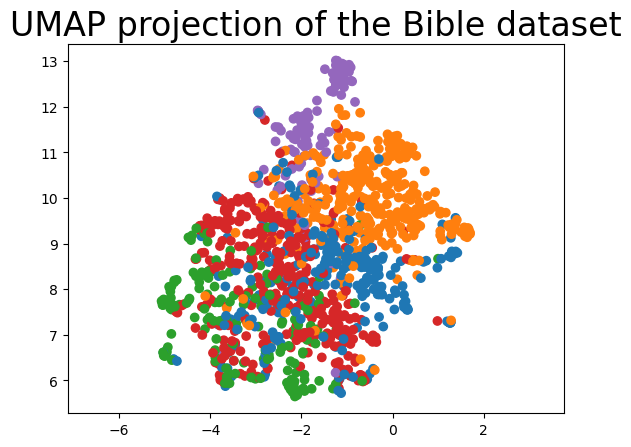

In [30]:
import seaborn as sns
plt.scatter(
    embedding[:, 0],
    embedding[:, 1],
    c=[sns.color_palette()[x] for x in df_text['cluster']])
plt.gca().set_aspect('equal', 'datalim')
plt.title('UMAP projection of the Bible dataset', fontsize=24);

In [31]:
from sklearn.cluster import OPTICS
import numpy as np
clustering = OPTICS(min_samples=5).fit(X_pca)
dbscan_labels = clustering.labels_

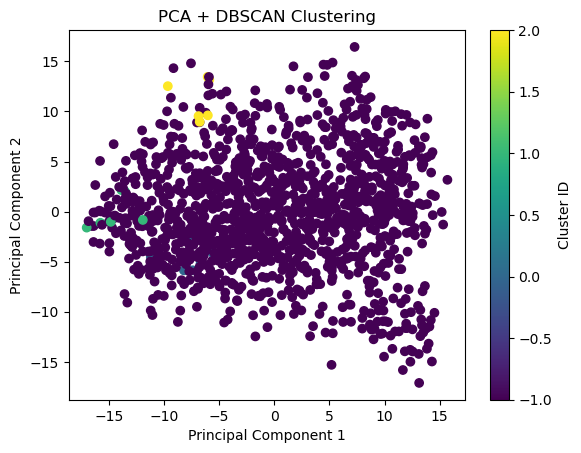

In [32]:
# Plot the result
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=dbscan_labels, cmap='viridis')
plt.title("PCA + DBSCAN Clustering")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.colorbar(label="Cluster ID")
plt.show()

In [33]:
import pandas as pd
labels = {'labels':dbscan_labels}
labels = pd.DataFrame(labels)
labels.groupby('labels').size()

labels
-1    1316
 0       6
 1       6
 2       6
dtype: int64